# Peer-graded Assignment: Capstone Project - The Battle of Neighborhoods (Week2)

## Instructions

Now that you have been equipped with the skills and the tools to use location data to explore a geographical location, over the course of two weeks, you will have the opportunity to be as creative as you want and come up with an idea to leverage the **Foursquare** location data to explore or compare neighborhoods or cities of your choice or to come up with a problem that you can use the **Foursquare** location data to solve. If you cannot think of an idea or a problem, here are some ideas to get you started:<br>
<ol>
<li>In Module 3, we explored New York City and the city of Toronto and segmented and clustered their neighborhoods. Both cities are very diverse and are the financial capitals of their respective countries. One interesting idea would be to compare the neighborhoods of the two cities and determine how similar or dissimilar they are. Is New York City more like Toronto or Paris or some other multicultural city? I will leave it to you to refine this idea.</li>
<li>In a city of your choice, if someone is looking to open a restaurant, where would you recommend that they open it? Similarly, if a contractor is trying to start their own business, where would you recommend that they setup their office?</li>
</ol>

These are just a couple of many ideas and problems that can be solved using location data in addition to other datasets. No matter what you decide to do, make sure to provide sufficient justification of why you think what you want to do or solve is important and why would a client or a group of people be interested in your project.

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [11]:
# We import the required packages for the Peer-graded Assigment
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# We set the display options of pandas, so we can display the whole table when we are done.
pd.options.display.max_rows = 999

In [9]:
demographics = pd.read_csv('/content/drive/My Drive/Colab Notebooks/demographics.csv',header=0,sep=';')
demographics.head()

,borough,nta_code,nta_name,population,under_5_years,5-9_years,10-14_years,15-19_years,20-24_years,25-29_years,30-34_years,35-39_years,40-44_years,45-49_years,50-54_years,55-59_years,60-64_years,over_65_years,median_age,people_per_acre,households,"less_than_10,000",10000_to_14999,15000_to_24999,25000_to_34999,35000_to_49999,50000_to_74999,75000_to_99999,100000_to_149999,150000_to_199999,200000_or_more,median_income,mean_income
0,Bronx,BX31,Allerton-Pelham Gardens,28903,1679,1706,1763,2039,1964,1703,1798,1654,1937,2203,2027,1785,1619,5026,40,39.8,9587,836,348,797,773,1160,1764,1155,1562,765,427,61638,78489
1,Bronx,BX05,Bedford Park-Fordham North,54415,4517,4183,4058,4623,4693,4663,4262,3854,3830,3786,3490,2724,2029,3703,31,158.3,18636,3096,2319,3041,2063,2431,2728,1583,1077,149,149,29549,41324
2,Bronx,BX06,Belmont,27378,2076,2073,1969,3458,3937,2157,1846,1761,1580,1622,1229,966,756,1948,25,87.4,8643,1993,1202,1648,1215,836,950,366,329,90,14,21924,31783
3,Bronx,BX07,Bronxdale,35538,2458,2311,2404,2600,2629,2953,2636,2389,2491,2546,2364,1960,1575,4222,35,101.8,13361,2283,1192,1742,1199,1890,2128,1615,1018,238,56,36859,47292
4,Bronx,BX01,Claremont-Bathgate,31078,2890,2816,2769,3113,2658,2325,2012,1836,2078,2095,1830,1293,1070,2293,28,82.4,10299,2594,1744,1760,1211,1083,1193,323,327,56,8,20461,29720


In [57]:
pop_table=pd.DataFrame(demographics['population'].groupby(demographics['borough']).sum())
pop_table.reset_index(inplace=True)
pop_table

,borough,population
0,Bronx,1372111
1,Brooklyn,2503518
2,Manhattan,1584024
3,Queens,2230286
4,Staten Island,468730


<BarContainer object of 5 artists>

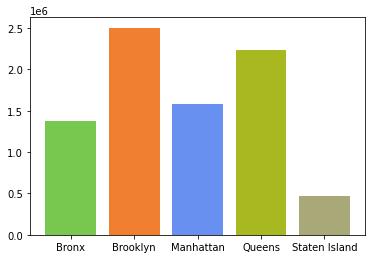

In [56]:
# Pokemon palette
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]
# barplot of the population by borough
plt.bar(pop_table.borough,pop_table.population, color =pkmn_type_colors)

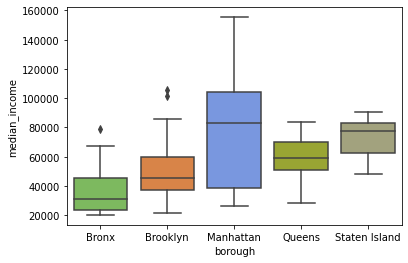

In [54]:
#plt.boxplot(x=demographics['median_income'])
# Boxplot
sns.boxplot(x=demographics['borough'],y=demographics['median_income'],palette=pkmn_type_colors)

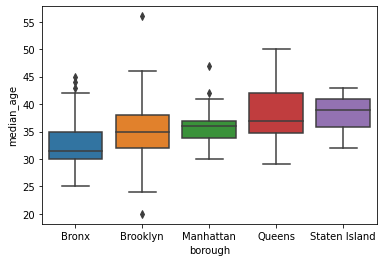

In [53]:
#plt.boxplot(x=demographics['median_income'])
# Boxplot
sns.boxplot(x=demographics['borough'],y=demographics['median_age'],color='white', palette=pkmn_type_colors)
sns.boxplot?

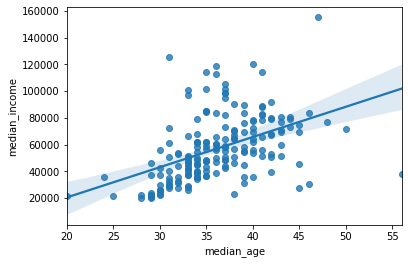

In [49]:
sns.regplot(x=demographics['median_age'],y=demographics['median_income'])
sns.regplot?

In [0]:
# We use the pandas' read_html function to read the wikitable
df1 = pd.read_html('http://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M', match='Postal code', header =0)[0]

In [0]:
# We check whether the reading of the table was successfull or not.
# df1.head()

**3.** To create the above dataframe:
<ul>
<li>The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood</li>
<li>Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.</li>
<li>More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11 in the above table.</li>
<li>If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.</li>
<li>Clean your Notebook and add Markdown cells to explain your work and any assumptions you are making.</li>
<li>In the last cell of your notebook, use the .shape method to print the number of rows of your dataframe.</li>
</ul>

In [0]:
# We get the index of those registers whose Boroughs are not assigned
indexNames = df1[df1.Borough=='Not assigned'].index

In [0]:
# We drop the rows in which the Borough is not assigned
df1.drop(indexNames,inplace=True)

In [0]:
# We reset the index of the DataFrame
df1.reset_index(drop=True, inplace=True)

In [0]:
# We replace the '/' with ',' for every Neighborhood
df1['Neighborhood'] = df1['Neighborhood'].apply(lambda x: x.replace(' /',','))

In [0]:
# We now check there are no Neighborhoods with 'Not assigned' values
if sum(df1['Neighborhood']=='Not assigned')==0:
    print('All Neighborhood values are Ok.')

All Neighborhood values are Ok.


In [0]:
# We finally display the complete table of the List_of_postal_codes_of_Canada:_M
df1

,Postal code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
5,M9A,Etobicoke,Islington Avenue
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


**4.** Submit a link to your Notebook on your Github repository. (10 marks) <br>
**Note:** There are different website scraping libraries and packages in Python. For scraping the above table, you can simply use pandas to read the table into a pandas dataframe.

Here is a link to a csv file that has the geographical coordinates of each postal code: http://cocl.us/Geospatial_data/Geospatial_Coordinates.csv . Use the csv file to create the following dataframe:

In [0]:
df2 = pd.read_csv(r'http://cocl.us/Geospatial_data/Geospatial_Coordinates.csv')
# df2.head()

In [0]:
# We now merge both DataFrames
df = df1.merge(df2[['Latitude','Longitude']], how = 'left', left_on=df1['Postal code'],right_on=df2['Postal Code'])
df

,key_0,Postal code,Borough,Neighborhood,Latitude,Longitude
0,M3A,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
5,M9A,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242
6,M1B,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
7,M3B,M3B,North York,Don Mills,43.745906,-79.352188
8,M4B,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,M5B,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


**5.** Explore and cluster the neighborhoods in Toronto. You can decide to work with only boroughs that contain the word Toronto and then replicate the same analysis we did to the New York City data. It is up to you.<br>

Just make sure:
<ol>
<li>to add enough Markdown cells to explain what you decided to do and to report any observations you make.</li>
<li>to generate maps to visualize your neighborhoods and how they cluster together.</li>
</ol>
Once you are happy with your analysis, submit a link to the new Notebook on your Github repository. (3 marks)


## 1. Download and Explore Dataset

In [0]:
# To simplify the analysis, we have decided to work only with Boroughs that contain the word Toronto. 
downtown_data = df[df['Borough'] == 'Downtown Toronto'].reset_index(drop=True)
downtown_data.head()

,key_0,Postal code,Borough,Neighborhood,Latitude,Longitude
0,M5A,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,M7A,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
2,M5B,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,M5C,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M5E,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306


In [59]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# Let's get the geographic coordinates of Toronto's Downtown

address = 'Queens, NY'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7498243, -73.7976337.


Let's visualize Toronto and the neighborhoods in it.

In [60]:
# Create map of Downtown Toronto using latitude and longitude values

import folium # map rendering library
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

map_downtown = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(downtown_data['Latitude'], downtown_data['Longitude'], downtown_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_downtown)  
    
map_downtown

NameError: ignored

Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.

Define Foursquare Credentials and Version

In [0]:
CLIENT_ID = 'xxx' # your Foursquare ID
CLIENT_SECRET = 'xxx' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: xxx
CLIENT_SECRET:xxx


## 2. Explore Neighborhoods in Manhattan

In [0]:
import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

In [0]:
# Let's create a function to get the top 100 venues that are in a radius of 500 
# meters for all the neighborhoods in Downtown Toronto

LIMIT = 100 # limit of number of venues returned by Foursquare API

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [0]:
downtown_venues = getNearbyVenues(names=downtown_data['Neighborhood'],
                                   latitudes=downtown_data['Latitude'],
                                   longitudes=downtown_data['Longitude']
                                  )

Regent Park, Harbourfront
Queen's Park, Ontario Provincial Government
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Harbourfront East, Union Station, Toronto Islands
Toronto Dominion Centre, Design Exchange
Commerce Court, Victoria Hotel
University of Toronto, Harbord
Kensington Market, Chinatown, Grange Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst  Quay, South Niagara, Island airport
Rosedale
Stn A PO Boxes
St. James Town, Cabbagetown
First Canadian Place, Underground city
Church and Wellesley


In [0]:
# Let's check the size of the resulting dataframe
print(downtown_venues.shape)
downtown_venues.head()

(1259, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Regent Park, Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Regent Park, Harbourfront",43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,"Regent Park, Harbourfront",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa
4,"Regent Park, Harbourfront",43.65426,-79.360636,Morning Glory Cafe,43.653947,-79.361149,Breakfast Spot


Let's check how many venues were returned for each neighborhood

In [0]:
downtown_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,56,56,56,56,56,56
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",16,16,16,16,16,16
Central Bay Street,73,73,73,73,73,73
Christie,18,18,18,18,18,18
Church and Wellesley,77,77,77,77,77,77
"Commerce Court, Victoria Hotel",100,100,100,100,100,100
"First Canadian Place, Underground city",100,100,100,100,100,100
"Garden District, Ryerson",100,100,100,100,100,100
"Harbourfront East, Union Station, Toronto Islands",100,100,100,100,100,100


Let's find out how many unique categories can be curated from all the returned venues

In [0]:
print('There are {} uniques categories.'.format(len(downtown_venues['Venue Category'].unique())))

There are 207 uniques categories.


## 3. Analyze Each Neighborhood

In [0]:
# one hot encoding
downtown_onehot = pd.get_dummies(downtown_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
downtown_onehot['Neighborhood'] = downtown_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [downtown_onehot.columns[-1]] + list(downtown_onehot.columns[:-1])
downtown_onehot = downtown_onehot[fixed_columns]

downtown_onehot.head()

,Yoga Studio,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Butcher,...,Record Shop,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Snack Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


And let's examine the new dataframe size.

In [0]:
downtown_onehot.shape

(1259, 207)

Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [0]:
downtown_grouped = downtown_onehot.groupby('Neighborhood').mean().reset_index()
downtown_grouped

,Neighborhood,Yoga Studio,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,...,Record Shop,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Snack Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,Berczy Park,0.000000,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.000000,0.000000,0.00,0.017857,0.000000,0.000000,0.000000,0.017857,0.000000,0.017857,0.035714,0.000000,0.000000,0.00,0.017857,0.017857,0.000000,0.035714,0.000000,0.000000,0.017857,0.0000,0.000000,0.000000,0.00,0.017857,0.00,0.000000,0.00,0.000000,0.000000,...,0.000000,0.0000,0.035714,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.035714,0.000000,0.017857,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.017857,0.000000,0.00,0.000000,0.017857,0.000000,0.00,0.000000,0.017857,0.000000,0.000000,0.00,0.00,0.017857,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
1,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000,0.000000,0.0625,0.0625,0.0625,0.125,0.125,0.0625,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062500,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0625,0.000000,0.062500,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.000000,...,0.000000,0.0625,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.062500,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
2,Central Bay Street,0.013699,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.013699,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013699,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.00,0.000000,0.00,0.027397,0.00,0.027397,0.000000,...,0.000000,0.0000,0.000000,0.00,0.000000,0.027397,0.000000,0.041096,0.00,0.000000,0.013699,0.000000,0.000000,0.00,0.000000,0.000000,0.027397,0.00,0.000000,0.00,0.013699,0.000000,0.00,0.013699,0.000000,0.000000,0.00,0.013699,0.027397,0.000000,0.000000,0.00,0.00,0.013699,0.000000,0.000000,0.013699,0.000000,0.000000,0.00
3,Christie,0.000000,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.055556,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.000000,...,0.000000,0.0000,0.055556,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
4,Church and Wellesley,0.025974,0.012987,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.012987,0.000000,0.00,0.000000,0.012987,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.012987,0.000000,0.000000,0.000000,0.0000,0.012987,

Let's confirm the new size

Let's print each neighborhood along with the top 5 most common venues

In [0]:
num_top_venues = 5

for hood in downtown_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = downtown_grouped[downtown_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
                venue  freq
0         Coffee Shop  0.05
1          Restaurant  0.04
2  Italian Restaurant  0.04
3                Café  0.04
4  Seafood Restaurant  0.04


----CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst  Quay, South Niagara, Island airport----
                venue  freq
0      Airport Lounge  0.12
1     Airport Service  0.12
2         Coffee Shop  0.06
3             Airport  0.06
4  Airport Food Court  0.06


----Central Bay Street----
                 venue  freq
0          Coffee Shop  0.16
1   Italian Restaurant  0.05
2                 Café  0.05
3       Sandwich Place  0.04
4  Japanese Restaurant  0.04


----Christie----
           venue  freq
0  Grocery Store  0.22
1           Café  0.17
2           Park  0.11
3      Nightclub  0.06
4    Gas Station  0.06


----Church and Wellesley----
                 venue  freq
0          Coffee Shop  0.06
1              Gay Bar  0.05
2  Japanese Restaurant  0.05
3     Sushi Restaur

Let's put that into a pandas dataframe¶

In [0]:
# First, let's write a function to sort the venues in descending order.
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

# Now let's create the new dataframe and display the top 10 venues for each neighborhood.
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = downtown_grouped['Neighborhood']

for ind in np.arange(downtown_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(downtown_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Seafood Restaurant,Cocktail Bar,Café,Cheese Shop,Restaurant,Bakery,Farmers Market,Beer Bar,Italian Restaurant
1,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Lounge,Airport Service,Harbor / Marina,Boat or Ferry,Plane,Rental Car Location,Sculpture Garden,Coffee Shop,Bar,Airport Terminal
2,Central Bay Street,Coffee Shop,Café,Italian Restaurant,Sandwich Place,Middle Eastern Restaurant,Japanese Restaurant,Bubble Tea Shop,Burger Joint,Gym / Fitness Center,Salad Place
3,Christie,Grocery Store,Café,Park,Baby Store,Nightclub,Coffee Shop,Restaurant,Gas Station,Italian Restaurant,Athletics & Sports
4,Church and Wellesley,Coffee Shop,Gay Bar,Japanese Restaurant,Sushi Restaurant,Restaurant,Pizza Place,Hotel,Gastropub,Burger Joint,Yoga Studio


## 4. Cluster Neighborhoods

In [0]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# Run k-means to cluster the neighborhood into 5 clusters.
# set number of clusters
kclusters = 5

downtown_grouped_clustering = downtown_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(downtown_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 3, 2, 4, 2, 2, 2, 2, 2, 2], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [0]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

downtown_merged = downtown_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
downtown_merged = downtown_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

downtown_merged.head() # check the last columns!

,key_0,Postal code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,0,Coffee Shop,Pub,Park,Bakery,Café,Breakfast Spot,Mexican Restaurant,Chocolate Shop,Event Space,Spa
1,M7A,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,0,Coffee Shop,Diner,Yoga Studio,Beer Bar,Distribution Center,Discount Store,Bar,Bank,Mexican Restaurant,Burrito Place
2,M5B,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,2,Coffee Shop,Clothing Store,Middle Eastern Restaurant,Bubble Tea Shop,Café,Cosmetics Shop,Japanese Restaurant,Italian Restaurant,Fast Food Restaurant,Ramen Restaurant
3,M5C,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,2,Café,Coffee Shop,Cocktail Bar,Italian Restaurant,Beer Bar,Restaurant,Hotel,American Restaurant,Cosmetics Shop,Seafood Restaurant
4,M5E,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,2,Coffee Shop,Seafood Restaurant,Cocktail Bar,Café,Cheese Shop,Restaurant,Bakery,Farmers Market,Beer Bar,Italian Restaurant


Finally, let's visualize the resulting clusters

In [0]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(downtown_merged['Latitude'], downtown_merged['Longitude'], downtown_merged['Neighborhood'], downtown_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 5. Examine Clusters

Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster.

### Cluster 1

In [0]:
downtown_merged.loc[downtown_merged['Cluster Labels'] == 0, downtown_merged.columns[[1] + list(range(5, downtown_merged.shape[1]))]]

,Postal code,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,-79.360636,0,Coffee Shop,Pub,Park,Bakery,Café,Breakfast Spot,Mexican Restaurant,Chocolate Shop,Event Space,Spa
1,M7A,-79.389494,0,Coffee Shop,Diner,Yoga Studio,Beer Bar,Distribution Center,Discount Store,Bar,Bank,Mexican Restaurant,Burrito Place


### Cluster 2

In [0]:
downtown_merged.loc[downtown_merged['Cluster Labels'] == 1, downtown_merged.columns[[1] + list(range(5, downtown_merged.shape[1]))]]

,Postal code,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,M4W,-79.377529,1,Park,Playground,Trail,Dance Studio,Dumpling Restaurant,Donut Shop,Doner Restaurant,Dog Run,Distribution Center,Discount Store


### Cluster 3

In [0]:
downtown_merged.loc[downtown_merged['Cluster Labels'] == 2, downtown_merged.columns[[1] + list(range(5, downtown_merged.shape[1]))]]

,Postal code,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,M5B,-79.378937,2,Coffee Shop,Clothing Store,Middle Eastern Restaurant,Bubble Tea Shop,Café,Cosmetics Shop,Japanese Restaurant,Italian Restaurant,Fast Food Restaurant,Ramen Restaurant
3,M5C,-79.375418,2,Café,Coffee Shop,Cocktail Bar,Italian Restaurant,Beer Bar,Restaurant,Hotel,American Restaurant,Cosmetics Shop,Seafood Restaurant
4,M5E,-79.373306,2,Coffee Shop,Seafood Restaurant,Cocktail Bar,Café,Cheese Shop,Restaurant,Bakery,Farmers Market,Beer Bar,Italian Restaurant
5,M5G,-79.387383,2,Coffee Shop,Café,Italian Restaurant,Sandwich Place,Middle Eastern Restaurant,Japanese Restaurant,Bubble Tea Shop,Burger Joint,Gym / Fitness Center,Salad Place
7,M5H,-79.384568,2,Coffee Shop,Café,Restaurant,Gym,Thai Restaurant,Deli / Bodega,Hotel,Bakery,Cosmetics Shop,Concert Hall
8,M5J,-79.381752,2,Coffee Shop,Aquarium,Restaurant,Café,Hotel,Italian Restaurant,Scenic Lookout,Sporting Goods Shop,Brewery,Fried Chicken Joint
9,M5K,-79.381576,2,Coffee Shop,Hotel,Café,Restaurant,Bar,Gastropub,Seafood Restaurant,American Restaurant,Italian Restaurant,Concert Hall
10,M5L,-79.379817,2,Coffee Shop,Café,Restaurant,Hotel,Gym,American Restaurant,Deli / Bodega,Japanese Restaurant,Seafood Restaurant,Italian Restaurant
11,M5S,-79.400049,2,Café,Bookstore,Japanese Restaurant,Bar,Italian Restaurant,Bakery,Restaurant,Beer Bar,Beer Store,Moving Target
12,M5T,-79.400049,2,Café,Vietnamese Restaurant,Coffee Shop,Bar,Vegetarian / Vegan Restaurant,Mexican Restaurant,Grocery Store,Farmers Market,Chinese Restaurant,Dumpling Restaurant


### Cluster 4

In [0]:
downtown_merged.loc[downtown_merged['Cluster Labels'] == 3, downtown_merged.columns[[1] + list(range(5, downtown_merged.shape[1]))]]

,Postal code,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,M5V,-79.39442,3,Airport Lounge,Airport Service,Harbor / Marina,Boat or Ferry,Plane,Rental Car Location,Sculpture Garden,Coffee Shop,Bar,Airport Terminal


### Cluster 5

In [0]:
downtown_merged.loc[downtown_merged['Cluster Labels'] == 4, downtown_merged.columns[[1] + list(range(5, downtown_merged.shape[1]))]]

,Postal code,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,M6G,-79.422564,4,Grocery Store,Café,Park,Baby Store,Nightclub,Coffee Shop,Restaurant,Gas Station,Italian Restaurant,Athletics & Sports
